# Exploratory Data Analysis

# 0.0 Introduction

In this notebook I explore the data in search of finding meaningful insights. I will begin by reviewing each variable's distribution. Then I will take a look to see what type of relationships have with each other. After that I will list specific questions and answer them with statistical tests.

In [58]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [59]:
# load data
df = pd.read_csv("train.csv")
df["zipcode"] = df["zipcode"].astype(str)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,mean_log_price_zip
0,622500.0,3,2.5,2290,14374,2.0,0,0,3,8,...,-122.074,2290,33450,13.341499,7.736307,7.736307,7.736307,9.573176,10.417807,13.532819
1,400000.0,3,2.5,2090,32718,2.0,1,4,3,7,...,-122.511,1200,192268,12.899220,7.346010,7.644919,7.090077,10.395681,12.166646,13.007341
2,455000.0,2,1.5,1310,12196,1.5,0,0,3,6,...,-122.122,2970,12196,13.028053,7.177782,7.177782,7.996317,9.408863,9.408863,13.327543
3,159075.0,4,1.5,1580,6200,1.0,0,0,3,6,...,-122.240,1320,6499,11.977131,6.672033,7.365180,7.185387,8.732305,8.779404,12.547945
4,555000.0,2,1.5,1780,4750,1.0,0,0,4,7,...,-122.395,1690,5962,13.226723,6.984716,7.484369,7.432484,8.465900,8.693161,13.213049


# 1.0 Univariate Analysis

In this section I review the distributions of each variable. For variables having a log transformation I will ignore the original column. 

In [60]:
# ignore original columns
i_orig = [c for c in df.columns if "log_" + c not in df.columns]

## 1.1 Review Distributions

Now I will review the distributions of each variable using histograms.

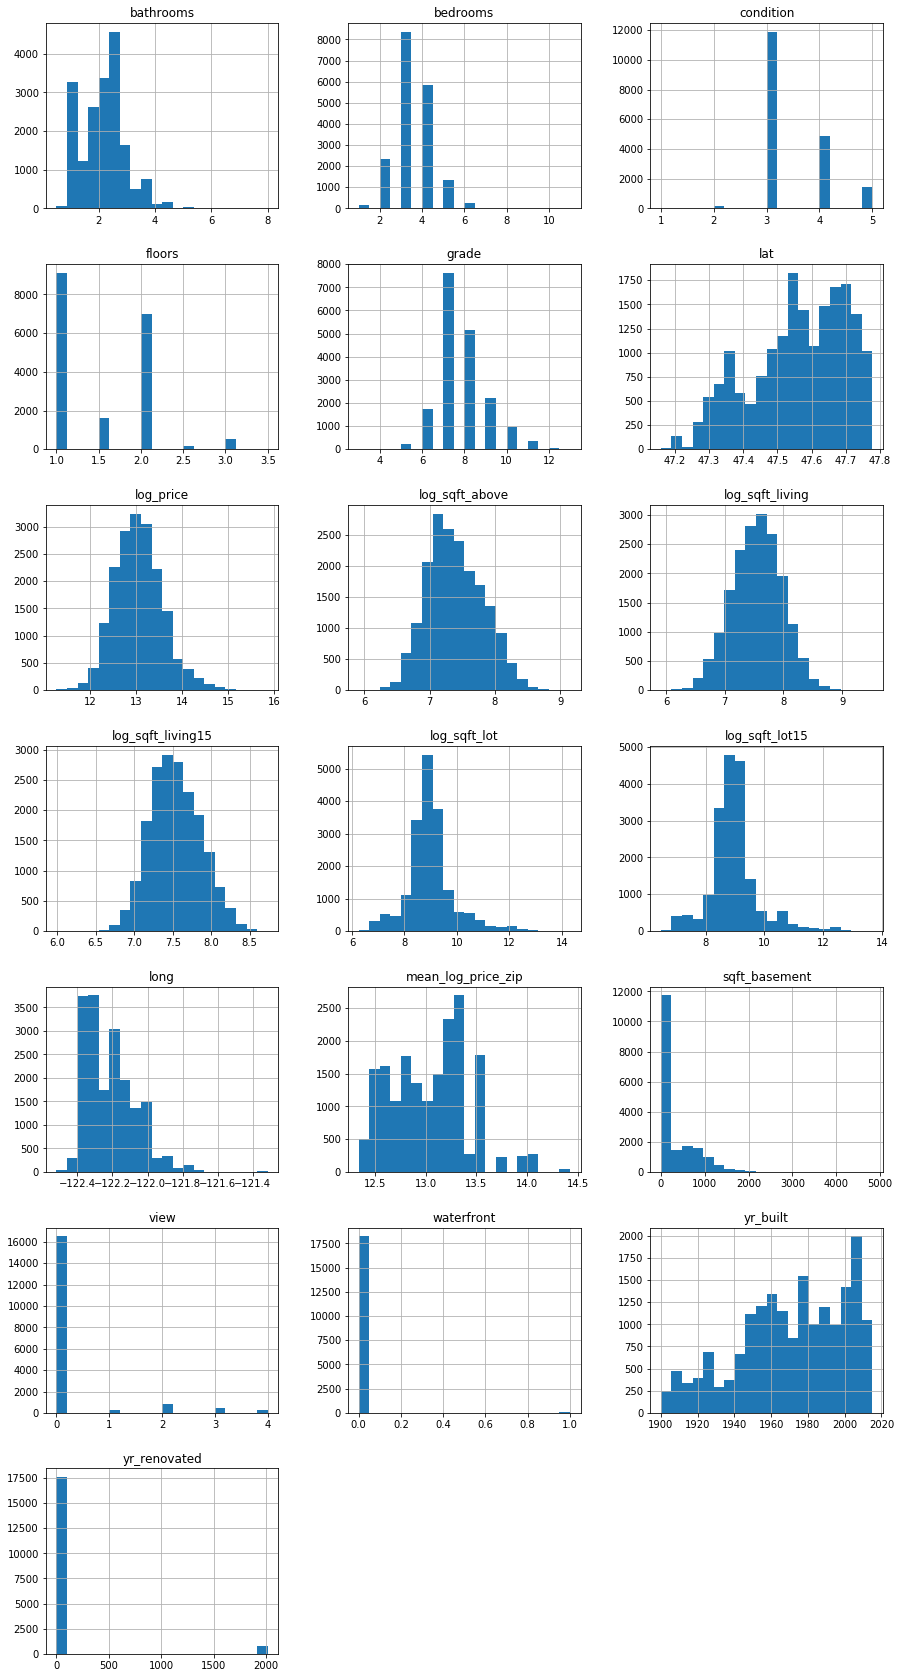

In [61]:
# plot histograms of each column
df[i_orig].hist(layout=(7, 3), figsize=(15, 30), bins=20)
plt.show()

By looking at these distributions we can see:
* there are spikes where houses stick to one bathroom and/or one floor. 
* It is rare for a condition to be below 3.
* Good views, basements, and renovations are rare.
* Almost none of the houses are waterfront properties.
* The population density is greatest in the north west

# 2.0 Bivariate Analysis

Here I will look to see what columns have relationships with one another. The most important thing to find out is which column is the most related to price.

## 2.1 Correlation With Price

First I will take a look at the columns to see which are the most correlated with price. This will provide some insight into what columns are the most useful so I can focus my analysis.

In [62]:
# find absolute value of correlations
# of each column and price
correlations = abs(df[i_orig].corr())["log_price"]

correlations

bedrooms              0.349579
bathrooms             0.552409
floors                0.307853
waterfront            0.176906
view                  0.354803
condition             0.040034
grade                 0.704643
sqft_basement         0.316943
yr_built              0.081851
yr_renovated          0.114563
lat                   0.446540
long                  0.049090
log_price             1.000000
log_sqft_above        0.585528
log_sqft_living       0.675387
log_sqft_living15     0.610761
log_sqft_lot          0.138956
log_sqft_lot15        0.126476
mean_log_price_zip    0.727799
Name: log_price, dtype: float64

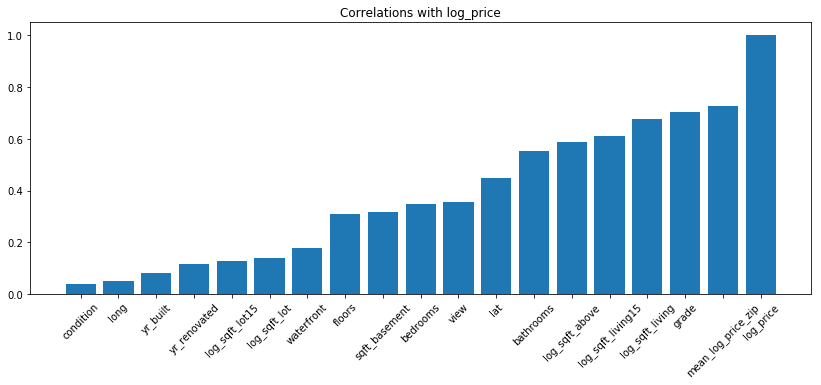

In [63]:
# get variable names and values in a nested list form
# using the dict() and .items() functions with the series
names_vals = dict(correlations).items()

# sort names and values based on value
names_vals = sorted(names_vals, key = lambda x: x[1])

# seperate names and values into two list
names = [x[0] for x in names_vals]
values = [x[1] for x in names_vals]

# create a bar plot
plt.figure(figsize=(14, 5))
plt.bar(names, values)
plt.xticks(rotation=45)
plt.title("Correlations with log_price")
plt.show()

## 2.1 Continuous Variables

Now I will take the some of the most promising continuos variables along with the log of price and plot them together to see if they have relationships.

In [76]:
# select some continuous columns highly correlated with price
promising_cols_1 = ["log_sqft_living", "log_sqft_living15", "log_sqft_above", "log_price"]

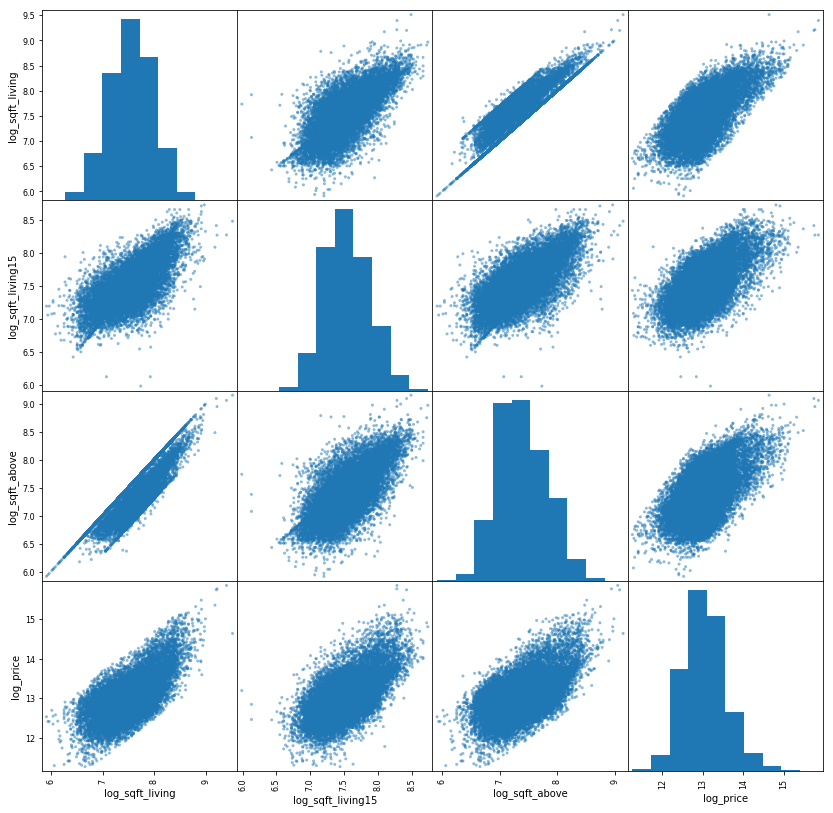

In [77]:
# create a scatter matrix
pd.plotting.scatter_matrix(df[promising_cols_1], figsize=(14, 14))
plt.show()

We can see here that all the features here have a purely linear relationship. There is no sign of a complex relationship.

# 2.2 Categorical Columns

# 3.0 Analysis Based On Location

Now I will make some maps by taking advantage of the fact I have latitude and longitude values. I will make four maps: the first map will show what areas of town have higher prices. The second map will approximate zipcode locations and show median zip code prices. The third will try to show which areas of town have the oldest houses, and the last map will give information on where the waterfront properties are located.

For the second map I need to approximate the center of each zipcode.

In [94]:
# approximate center of each zipcode

# create a groupby object for zipcodes
groupby = df.groupby("zipcode")

# create a new dataframe for zipcode data
zc_df = pd.DataFrame()

# fill new dataframe with median log_price's
zc_df["log_price"] = groupby["log_price"].median()

# also fill in the amount of houses per zipcode
zc_df["n_houses"]= groupby["log_price"].count()

# fill new dataframe with the mean of the maximum and minimum 
# values for latitudes and longitudes
zc_df["lat"] = (groupby["lat"].max() + groupby["lat"].min())/2
zc_df["long"] = (groupby["long"].max() + groupby["long"].min())/2

For the fourth map I need the waterfront column in boolean form.

In [90]:
# make waterfront bool
df["Is Waterfront"] = df["waterfront"].map(bool)

Now I will plot the maps with seaborn.